In [7]:
import pandas as pd

# 读取数据
df = pd.read_csv('data/users_combined_info_500.csv')

# 查看数据概况
print("\n缺失值统计：")
print(df.isnull().sum())

# 1. 处理缺失值
# 如果字段缺失值较少，可以选择填充；否则删除
# 假设 location 和 country 的缺失值用 'Unknown' 填充
df['location'] = df['location'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# 对数值型字段 total_influence 的缺失值用中位数填充
df['total_influence'] = df['total_influence'].fillna(df['total_influence'].median())

# 打印处理后的缺失值统计
print("\n缺失值处理后：")
print(df.isnull().sum())

# 2. 删除重复数据
# 检查是否存在完全重复的行
print("\n重复行数：", df.duplicated().sum())
# 删除重复行
df = df.drop_duplicates()

# 3. 数据类型转换
# user_id 应为字符串类型
df['user_id'] = df['user_id'].astype(str)

# total_influence 应为浮点数
df['total_influence'] = df['total_influence'].astype(float)

# event_time 应为日期时间类型
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

# 检查是否有无法转换的时间值（转换失败会变成 NaT）
print("\n无法解析的 event_time 数量：", df['event_time'].isna().sum())

# 如果 event_time 转换失败且无法填补，可以选择删除这些行
df = df.dropna(subset=['event_time'])

# 4. 处理异常值（可选）
# total_influence 的异常值处理（假设异常值为过大的影响力，比如超过 99 分位数）
upper_limit = df['total_influence'].quantile(0.99)
df = df[df['total_influence'] <= upper_limit]

# 5. 标准化 location 和 country
# 对 location 和 country 字段去除前后空格并统一大小写
df['location'] = df['location'].str.strip().str.title()
df['country'] = df['country'].str.strip().str.title()

# 打印清理后的数据概况
print("\n清理后的数据概况：")
print(df.info())
print("\n前几行数据：")
print(df.head())

# 6. 保存清理后的数据
df.to_csv('github_data_cleaned.csv', index=False)



缺失值统计：
user_id                0
name                   0
location               0
total_influence        0
country            88151
event_type             0
event_action           0
event_time             0
dtype: int64

缺失值处理后：
user_id            0
name               0
location           0
total_influence    0
country            0
event_type         0
event_action       0
event_time         0
dtype: int64

重复行数： 49252

无法解析的 event_time 数量： 0

清理后的数据概况：
<class 'pandas.core.frame.DataFrame'>
Index: 1234768 entries, 10764 to 1294775
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype                    
---  ------           --------------    -----                    
 0   user_id          1234768 non-null  object                   
 1   name             1234768 non-null  object                   
 2   location         1234768 non-null  object                   
 3   total_influence  1234768 non-null  float64                  
 4   country          1234768 non-

country
United States           287907
Germany                 177837
Unknown                  86285
China                    71450
France                   58511
Canada                   56920
Netherlands              51724
United Kingdom           49915
Czechia                  47117
Japan                    46054
Switzerland              37768
Australia                35390
Italy                    26837
Poland                   19905
New Zealand              18331
Spain                    14709
Austria                  11690
Sweden                    9730
Finland                   8378
Bulgaria                  7300
Hungary                   6998
Denmark                   6897
Belgium                   6294
Norway                    5994
India                     5610
Singapore                 5203
United Arab Emirates      5136
Brazil                    4995
Hong Kong                 4727
Malaysia                  4491
Pakistan                  4460
Indonesia                 4239


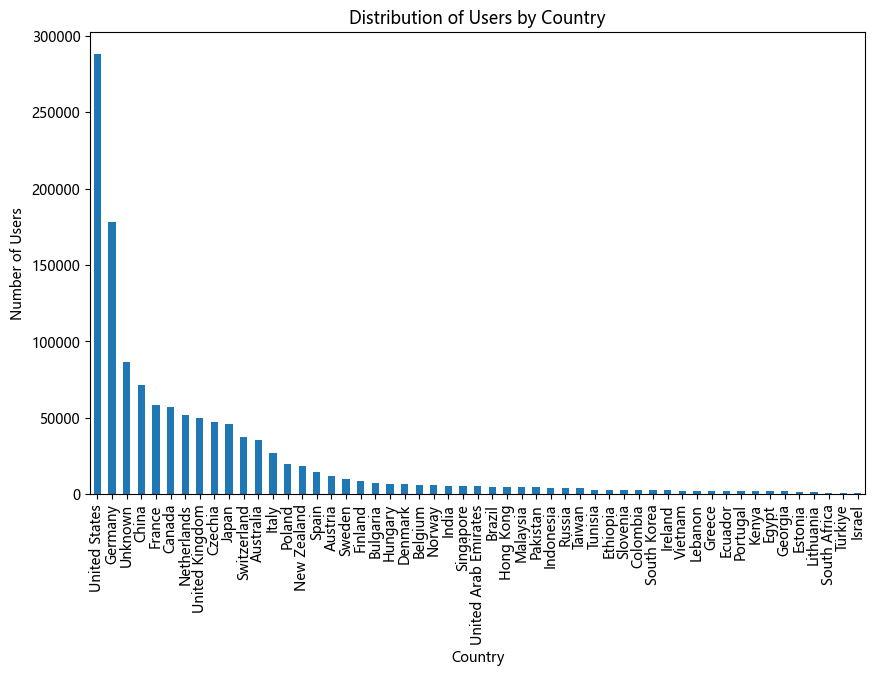

location
Germany                      104300
Prague                        36887
Japan                         26919
Nyc                           17015
San Francisco                 16171
Palo Alto, Ca                 16149
Paris, France                 15433
Switzerland                   15389
France                        14938
Berlin, Germany               14916
Tokyo, Japan                  14450
New York                      12813
Enschede, The Netherlands     11185
San Francisco, Ca             11150
Berlin                        10831
Cambridge, Ma                 10695
New Zealand                   10285
The Internet                  10011
Beijing                        9534
Milan                          9331
London, Uk                     9121
New York, Ny                   8615
Netherlands                    8390
Zurich                         8244
Zurich, Switzerland            8011
Name: count, dtype: int64


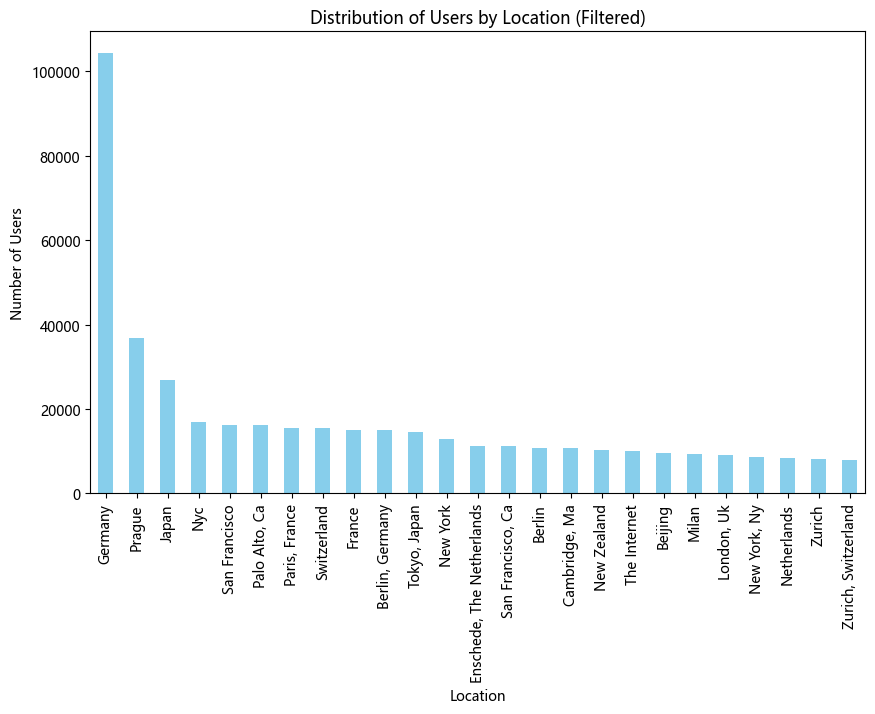

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
df = pd.read_csv('github_data_cleaned.csv')
country_distribution = df['country'].value_counts()
print(country_distribution)
location_distribution = df['location'].value_counts()
print(location_distribution)

rcParams['font.family'] = 'Microsoft YaHei'
country_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

threshold = 8000
location_filtered = location_distribution[location_distribution > threshold]


print(location_filtered)
location_filtered.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribution of Users by Location (Filtered)')
plt.xlabel('Location')
plt.ylabel('Number of Users')
# plt.xticks(rotation=45, ha='right') 
plt.show()




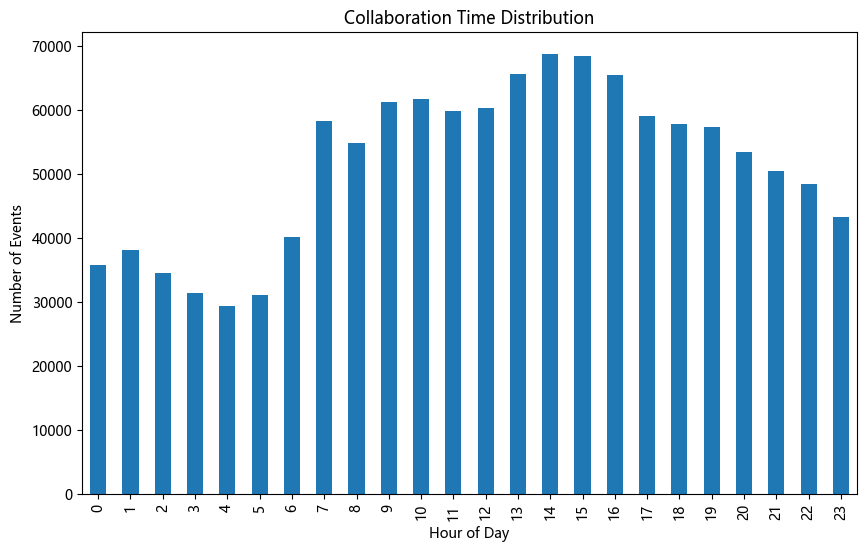

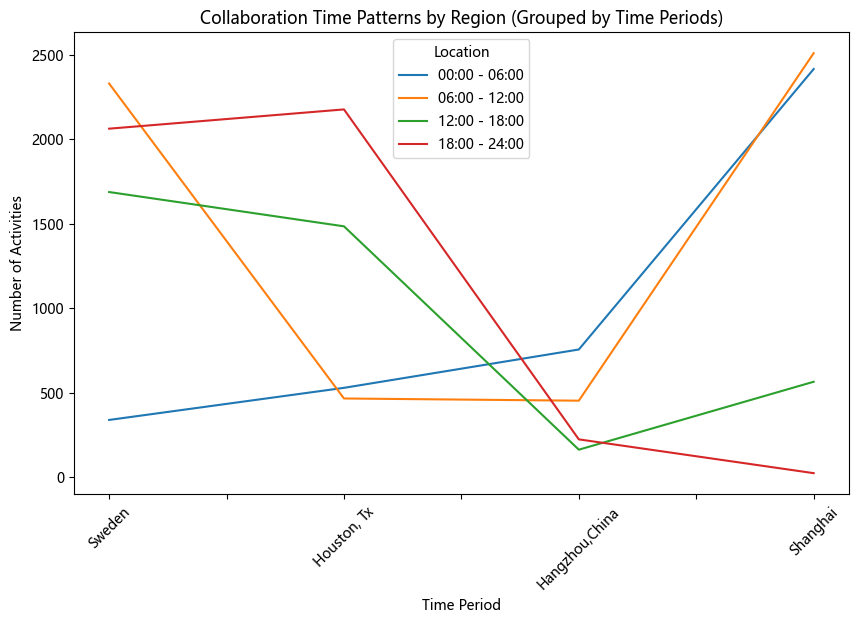

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("github_data_cleaned.csv")


df['event_time'] = pd.to_datetime(df['event_time'])

df['hour'] = df['event_time'].dt.hour

df['hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title('Collaboration Time Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.show()


def get_time_period(hour):
    if 0 <= hour < 6:
        return '00:00 - 06:00'
    elif 6 <= hour < 12:
        return '06:00 - 12:00'
    elif 12 <= hour < 18:
        return '12:00 - 18:00'
    else:
        return '18:00 - 24:00'


df['time_period'] = df['hour'].apply(get_time_period)

location_time_period_distribution = df.groupby(['location', 'time_period']).size().unstack(fill_value=0)


location_time_period_distribution.loc[['Sweden', 'Houston, Tx','Hangzhou,China','Shanghai'], :].plot(kind='line', figsize=(10, 6))
plt.title('Collaboration Time Patterns by Region (Grouped by Time Periods)')
plt.xlabel('Time Period')
plt.ylabel('Number of Activities')
plt.legend(title='Location')
plt.xticks(rotation=45)
plt.show()


每个用户的提交次数：
user_id
11146458    35532
158862      35237
1580956     20214
40306929    16149
43724913    14492
9824526     12892
195327      11185
28706372    10448
50149701     9331
20182680     9095
Name: count, dtype: int64
高活跃用户：user_id
11146458    35532
158862      35237
1580956     20214
40306929    16149
43724913    14492
9824526     12892
195327      11185
28706372    10448
50149701     9331
20182680     9095
138339       8300
8188402      8244
46537034     7499
19890894     6428
7258858      6207
15247171     6138
7083755      6124
4399574      5523
122666       5495
1309177      5405
1439341      5231
282080       5122
490673       5055
8086956      4970
985347       4911
1814174      4846
12611259     4753
116184       4741
26833433     4679
140370       4625
18066964     4623
7237365      4620
81981        4509
477956       4489
7905502      4400
30802565     4366
4115580      4291
48202465     4290
864788       4267
6270921      4226
27350        4188
13323303     4056
45354

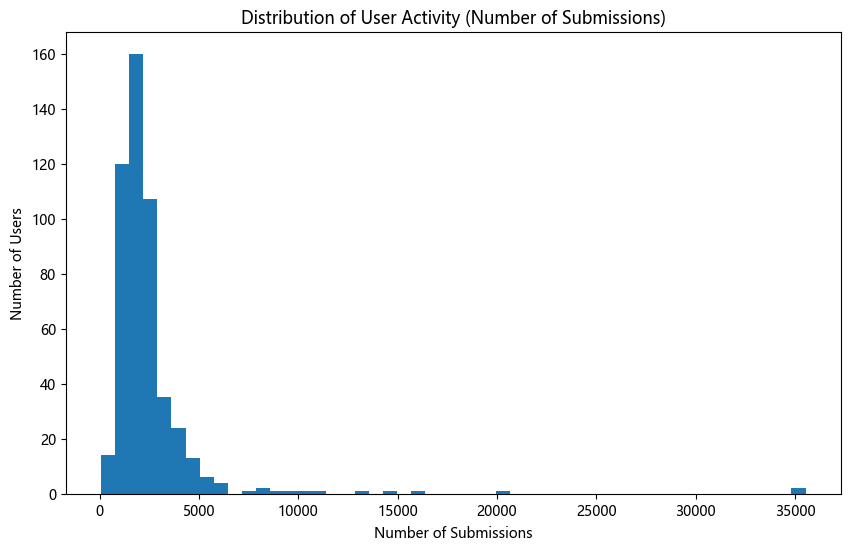

In [15]:
import pandas as pd

df = pd.read_csv("github_data_cleaned.csv")

user_activity_count = df['user_id'].value_counts()

print("每个用户的提交次数：")
print(user_activity_count.head(10))


high_activity_threshold = user_activity_count.quantile(0.9) 
low_activity_threshold = user_activity_count.quantile(0.1)   

high_active_users = user_activity_count[user_activity_count >= high_activity_threshold]
low_active_users = user_activity_count[user_activity_count <= low_activity_threshold]

print(f"高活跃用户：{(high_active_users)} ")
print(f"低活跃用户：{(low_active_users)} ")

import matplotlib.pyplot as plt

user_activity_count.plot(kind='hist', bins=50, figsize=(10, 6))
plt.title('Distribution of User Activity (Number of Submissions)')
plt.xlabel('Number of Submissions')
plt.ylabel('Number of Users')
plt.show()


所有用户的平均影响力是：533.0606913110794
高活跃用户的平均影响力：685.5803683354998


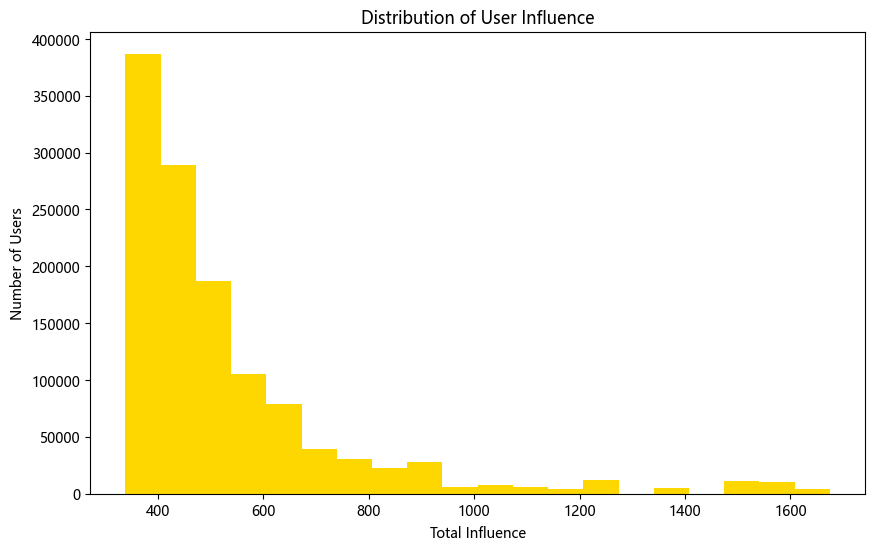

In [11]:
import pandas as pd

df = pd.read_csv("github_data_cleaned.csv")
influence_ranking = df[['user_id', 'total_influence']].drop_duplicates().sort_values(by='total_influence', ascending=False)


# print(influence_ranking.head(10))


active_user_influence = user_activity_count[user_activity_count >= high_activity_threshold].index
high_active_users_influence = df[df['user_id'].isin(active_user_influence)]['total_influence'].mean()

average_influence = df['total_influence'].mean()

print(f"所有用户的平均影响力是：{average_influence}")
print(f"高活跃用户的平均影响力：{high_active_users_influence}")

plt.figure(figsize=(10,6))
df['total_influence'].plot(kind='hist', bins=20, color='gold')
plt.title('Distribution of User Influence')
plt.xlabel('Total Influence')
plt.ylabel('Number of Users')
plt.show()


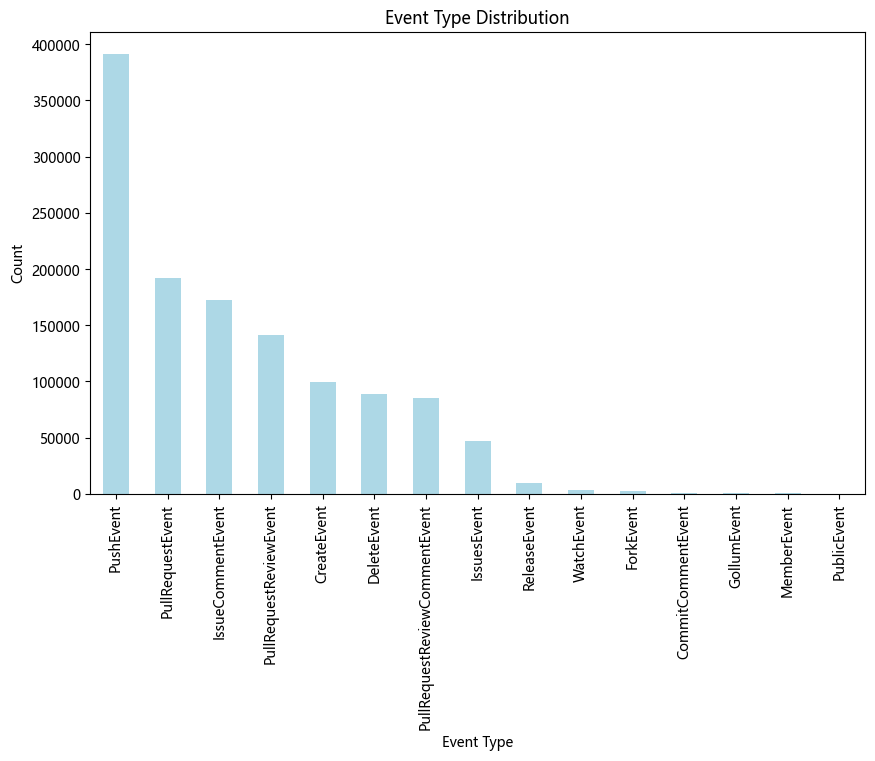

In [ ]:
event_type_dist = df['event_type'].value_counts()
plt.figure(figsize=(10,6))
event_type_dist.plot(kind='bar', color='lightblue')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

